# Nassim Taleb fat tail example from Wolfram interview 
[YouTube video](https://www.youtube.com/watch?v=_8j1XZ0N_wE&t=24s) around minute 4. This is a quick eexperiment in which fat tails emerge from a simple parameter variation of the standard deviation. Thus, the emergence of fat tails might be a problem of much greater concern for most statistical practices.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
from math import floor, ceil

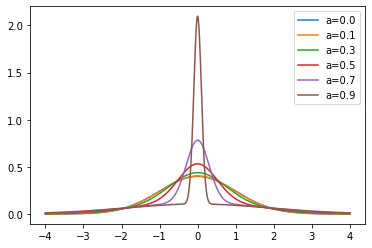

In [21]:
x = np.linspace(-4,4,1000)

for a in [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]:
    P1 = st.norm(loc=0, scale=1*(1+a))
    P2 = st.norm(loc=0, scale=1*(1-a))

    P1x = P1.pdf(x)
    P2x = P2.pdf(x)
    
    plt.plot(x, 0.5*(P1x+P2x), label="a={:.1f}".format(a))
    
plt.legend()

We can see that as the standard deviation variation parameter a increases, fat tails start emerging. We have to be careful with fat tails because big numbers can dominate all the behavior.

# Nassim Taleb Lectures
Free lectures from [YouTube](https://www.youtube.com/channel/UC8uY6yLP9BS4BUc9BSc0Jww/playlists)

Most standard statistics were designed for thin tails.

---
The main idea behind the Incerto project is that while there is a lot of un-
certainty and opacity about the world, and an incompleteness of informa-
tion and understanding, there is little, if any, uncertainty about what actions
should be taken based on such an incompleteness, in any given situation.

---

Incerto tries to connects five different fields related to tail probabilities and
extremes: mathematics, philosophy, social science, contract theory, decision theory,
and the real world.


### Lecture 1
Discusses the danger of assuming that correlations is a universal function which results can be interpreted like a recipe. This leads to the differentitation between **Standard Deviation (STD)** and **Mean Absolute Deviation (MAD)*

\begin{align*}
    \sqrt{\text{var}(x)} = \sigma &= \sqrt{\frac{1}{n}\sum_i^n(x_i - \bar x)^2} \quad \texttt{(STD)} \\
    \text{MAD}(x) &= \frac{1}{n}\sum_i^n | x_i - \bar x| \quad \texttt{(MAD)}
\end{align*}

in fact these should be 

\begin{align*}
    \frac{\sigma}{\texttt{MAD}(x)} = \sqrt{\frac{\pi}{2}} \approx 1.25
\end{align*}

based on the theory. We can see this does not verify in a simple example below. Say we have a million measurements of a variable $X$, with 999999 measurements resulting in zero and one measurement resulting in $10^6$.

In [3]:
# example differentiating STD vs MAD
n = int(1e6)    # 1 million observations
x = np.zeros(n)
x[-1] = 1e6
xbar = np.mean(x)

STDx = np.sqrt(np.sum((lambda xx: (xx-xbar)*(xx-xbar))(x))/n)
MADx = np.sum((lambda xx: np.abs(xx-xbar))(x))/n

print("STD = {:.2f}".format(STDx))
print("MAD = {:.2f}".format(MADx))

print("STD/MAD = {:4f}, whereas sqrt(pi/2) = {:.2f}".format(STDx/MADx, np.sqrt(np.pi/2)))

STD = 1000.00
MAD = 2.00
STD/MAD = 500.000250, whereas sqrt(pi/2) = 1.25


hence the absurdity of using standard deviations to non-gaussian distributions. Moreover, the use of one of the most popular statistical tools, the **Pearson correlation $\rho$** might be a pricy mistake if we are not guaranteed Gaussian behavior of the variables at hand. Its textbook definition is

\begin{align*}
   \rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}
\end{align*}

betas

\begin{align*}
    \beta = \rho_{X,Y} \frac{\sigma_X}{\sigma_Y}
\end{align*}

## Lecture 2
Again, the root of the problem are Fat Tails. Rare events happend less often, but when they occur they command most of the behavior.

Mistakes that most practicioners keep being made is to apply standard statistical tools like linear regression, correlations, among others..

In [4]:
# some examples of p-value bullshit

## Lecture 3: Law of Large Numbers
Law of large numbers, this is a fundamental theorem in statistics that states that the result of performing an experiment a large number of times, the average of this large number of tends to the expected value.

## Lecture 4: Central Limit Theorem
States that for $n$ of samples large, a distribution approximates to a Gaussian. Here, some few examples are shown for the case of Uniform and Paretto.

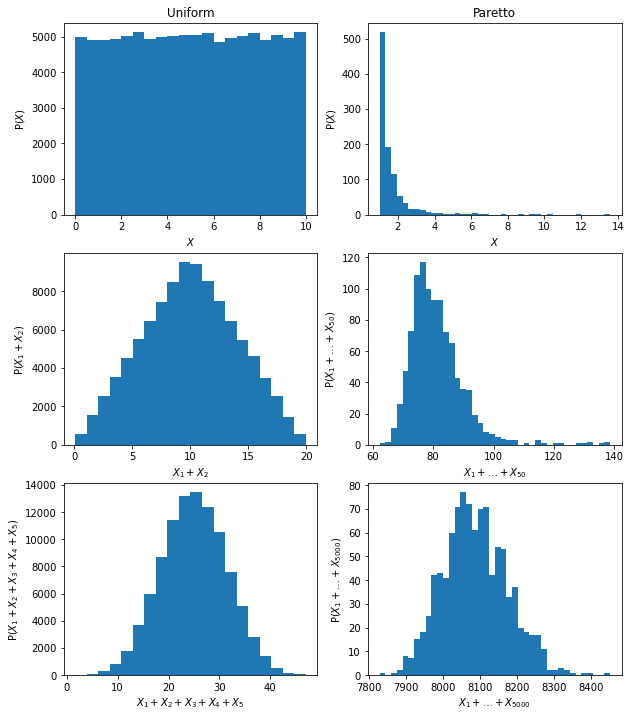

In [5]:
# start with uniform distribution
nsamp = int(1e5)

# Uniform distribution
def uniform_rvs(loc_=0, scale_=10, size_=nsamp):
    return st.uniform.rvs(loc=loc_, scale=scale_, size=size_)
xU = uniform_rvs()

# pareto
def pareto_rvs(b_=2.62, loc_=0, scale_=1, size_=int(1e3)):
    return st.pareto.rvs(b=b_, loc=loc_, scale=scale_, size=size_)
xP = pareto_rvs()

# plot
plt.figure(figsize=(10,12))

# uniform plots
plt.subplot(3,2,1)
plt.title("Uniform")
plt.hist(xU, bins=20)
plt.ylabel("P($X$)")
plt.xlabel("$X$")

plt.subplot(3,2,3)
plt.hist(xU+uniform_rvs(), bins=20)
plt.ylabel("P($X_1 + X_2$)")
plt.xlabel("$X_1 + X_2$")

plt.subplot(3,2,5)
plt.hist(np.sum([uniform_rvs() for i in range(5)], axis=0), bins=20)
plt.ylabel("P($X_1 + X_2 + X_3 + X_4 + X_5$)")
plt.xlabel("$X_1 + X_2 + X_3 + X_4 +X_5$")

# pareto plots
plt.subplot(3,2,2)
plt.title("Paretto")
plt.hist(xP, bins=40)
plt.ylabel("P($X$)")
plt.xlabel("$X$")

plt.subplot(3,2,4)
plt.hist(np.sum([pareto_rvs() for i in range(50)], axis=0), bins=40)
plt.ylabel("P($X_1 + \ldots + X_{50}$)")
plt.xlabel("$X_1 + \ldots + X_{50}$")

plt.subplot(3,2,6)
plt.hist(np.sum([pareto_rvs() for i in range(5000)], axis=0), bins=40)
plt.ylabel("P($X_1 + \ldots + X_{5000}$)")
plt.xlabel("$X_1 + \ldots + X_{5000}$")

plt.show()

Figure 2. Left plots show uniform distributions and right plots shows Pareto. (Top) basic distribution of one random variable $X$. (Middle) distribution of the sum of two random uniform samples $X_1, X_2$. (Bottom) Distribution of a sum of 5 or more random samples drawn from the same distribution, as we can see it approximates to a Gaussian.

## Lecture 5: Correlations

Correlations are supposed to measure how related two variables are. For example $\langle x, y\rangle$, reeturns a large weight when high associations between $x,y$ exists, and small weights otherwise.  Recall the Pearson correlation metric

\begin{align*}
   \rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y} = \frac{\text{E}[(X-\text{E}[X])(Y-\text{E}[Y])]}{\sigma_X\sigma_Y}
\end{align*}

where we are using the standard deviations $\sigma=\sqrt{\text{var}}$ as the scaling metric.

$\boxed{\text{Correlations only work when theres linear relationships.}\\ \text{Otherwise it fails or gives non-informative results.}}$

eg. in finance the **payoff** is a [short straddle](https://www.fidelity.com/learning-center/investment-products/options/options-strategy-guide/short-straddle) where correlations between options and options PNL are avoided. This is shown in the exmaple below (example 1).

Perason correlation = -0.000000


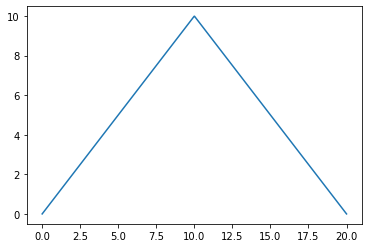

In [6]:
# example 1: options & options PNL
x = np.linspace(-10,10,1000)+10
y = (lambda xi: -np.abs(xi-10) + 10)(x)

print("Perason correlation = {:f}".format(np.corrcoef(x,y)[1][0]))

plt.plot(x, y)

Eventhought there is a strong relationship between x and y, the typical metric of Pearson correlation indicates zero dependance. This exemplifies the limitation of $\rho_{XY}$, and all studies heavily relying on this metric are not relieable.

Now another example

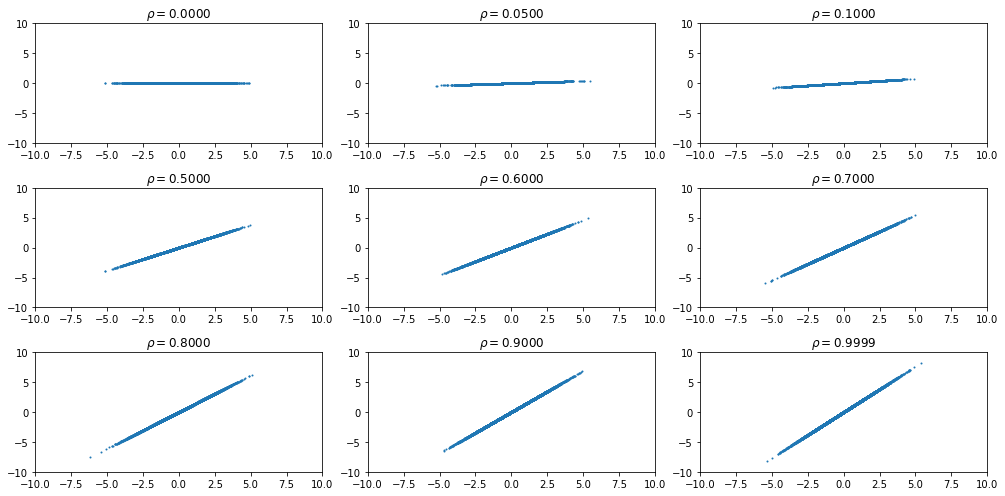

In [17]:
# example 2: binomial correlations
nsamp = 10000
mu = 0
sigma = 1
rho = [0, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9999]

# compute 
def binromal_dist(x, rho, mu_=mu, sigma_=sigma):
    beta = rho*np.std(x) / np.std(st.norm.rvs(loc=mu_, scale=sigma_, size=len(x)))
    return beta*x

# plot
nrowPlot = 3
ncolPlot = 3

fig, axes = plt.subplots(nrowPlot, ncolPlot, figsize=(14,7))

rr = 0
for i in range(nrowPlot):
    for j in range(ncolPlot):
        x = np.linspace(-2, 2, nsamp) + st.norm.rvs(loc=mu, scale=sigma, size=nsamp)
        axes[i,j].scatter(x, binromal_dist(x, rho[rr]), s=1)
        axes[i,j].set_xlim(-10,10)
        axes[i,j].set_ylim(-10,10)
        axes[i,j].set_title(r"$\rho={:.4f}$".format(rho[rr]))
        rr += 1
        
plt.tight_layout()        

## Lecture 6: Fooled by Metrics
The two caveats are

- Metrics are random variables
- Metrics are gamed like any other random variable

Lets see this very quickly in the following example: Lets assume two random variables $x_1$ and $y_1$ comming from the same distribution $X$.

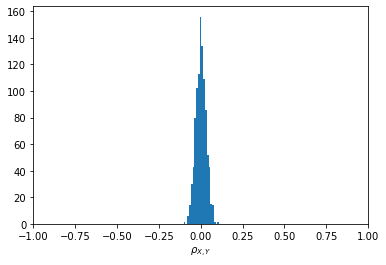

In [24]:
# 
nsamp = 1000

corr_list = []
for i in range(1000):
    x = st.norm.rvs(size=nsamp)
    y = st.norm.rvs(size=nsamp)
    corr_list.append(np.corrcoef(x,y)[0][1])


plt.hist(corr_list, bins=20)
plt.xlabel(r"$\rho_{X,Y}$")
plt.xlim(-1,1)
plt.show()

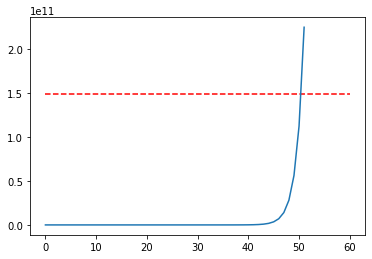

In [43]:
from astropy import units as uu
AU = uu.au.to(uu.m)

ni = 0.1e-3 ## meters, depth of a sheet of paper
nfolds = 51
cumLength = [1]

for i in range(nfolds):
    cumLength.append(cumLength[-1] * 2)

cl = np.array(cumLength) * ni

# plot
plt.plot(cl)
plt.hlines(AU, 0, 60, color="r", linestyle="--")

In [38]:
cumLength

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288,
 1048576,
 2097152,
 4194304,
 8388608,
 16777216,
 33554432,
 67108864,
 134217728,
 268435456,
 536870912,
 1073741824,
 2147483648,
 4294967296,
 8589934592,
 17179869184,
 34359738368,
 68719476736,
 137438953472,
 274877906944,
 549755813888,
 1099511627776,
 2199023255552,
 4398046511104,
 8796093022208,
 17592186044416,
 35184372088832,
 70368744177664,
 140737488355328,
 281474976710656,
 562949953421312,
 1125899906842624]

In [39]:
cumLength[-1]*2

2251799813685248